# CRISP-DM and Case Study 1
COMP20121 Machine Learning for Data Analytics

Author: [Jun He](https://sites.google.com/site/hejunhomepage/) 
 

## Learning objectives
1. Introduce Cross Industry Standard Process for Data Mining (CRISP-DM). We follow this process to develop a data mining project

2. Apply CRISP-DM to a case study. The case study is our first machine learning for data analysis project: classifying Iris flower species

## Part 1 Data Analysis Process
### Introductory example: Iris flower classification

* Iris flowers consist of three species.
* We want to develop a computer tool which is able to classify the specie of a flower 
* How to develop this project?
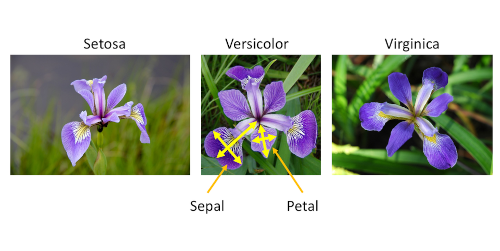

### Iris data set 
* The data set contains 3 classes of 50 instances each (total 150), where each class refers to a type of iris plant
* A row is called an **instance, record, sample, data point**
* A column name is called a **feature or attribute**
* A cell is called a **feature value of a sample**

In [ ]:
import pandas 
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pandas.read_csv("./iris.csv", names=names) # Load dataset
df.head(3) # first three samples

### Cross Industry Standard Process for Data Mining
**Cross-Industry Standard Process for Data Mining** (CRISP-DM) developed in 1996
* Fits data mining into the general problem-solving strategy of business/research unit
* Contributors include DaimlerChrysler, SPSS, and NCR
* Industry, tool and application neutral
* Non-proprietary and freely available

Extension:
* In 2015, IBM released an extension:  **Analytics Solutions Unified Method for Data Mining/Predictive Analytics**(ASUM-DM) 

### CRISP-DM: Phase 1
(1) **Business/Research Understanding Phase**
* Define project requirements and objectives
* Translate objectives into data mining problem definition
* Prepare preliminary strategy to meet objectives

Iris project  
* What are project requirements and objectives?
* Translate objectives into data mining problem definition: classification, not regression, not clustering, not forecasting
* Prepare preliminary strategy to meet objectives: select Python language,  ……


### CRISP-DM: Phase 2
(2) **Data Understanding Phase**
* Collect data
* Perform exploratory data analysis (EDA)
* Assess data quality
* Optionally, select interesting subsets

Iris project
* Where to collect data?
* Perform exploratory data analysis (EDA): draw figures for understanding the data
* Assess data quality: is any wrong value? is there any missing value?


### CRISP-DM: Phase 3
**(3) Data Preparation Phase**
* Prepares for modeling in subsequent phases
* Select cases and variables appropriate for analysis
* Cleanse and prepare data so it is ready for modeling tools
* Perform transformation of certain variables, if needed

Iris project
* Features: sepal length, width, petal length, width
* Target: specie class
* Do we need data cleansing for missing values or wrong values? Do we need data transformation? and how?


### CRISP-DM: Phase 4
**(4) Modeling Phase**
* Select and apply one or more modeling techniques
* Calibrate model settings to optimize results
* If necessary,  additional data preparation may be required for supporting a particular technique

Iris project:
* Which model? 
* How to train the model?

### CRISP-DM: Phase 5
**(5) Evaluation Phase**
* Evaluate one or more models for effectiveness 
* Determine whether defined objectives achieved
* Establish whether some important facet of the problem has not been sufficiently accounted for
* Make decision regarding data mining results before deploying to field

Iris  project
* How to evaluate the performance of the model?
* Does the model satisfiy the project requirement?  


### CRISP-DM: Phase 6
**(6) Deployment Phase**
* Make use of models created
* Simple deployment example: generate report
* Complex deployment example: implement parallel data mining effort in another department
* In businesses, customer often carries out deployment based on your model

Iris project
* How to make use of the model? write mannual? 
* Write a techinical report?

### CRISP-DM: Six Phases
Data mining projects follow iterative, adaptive life cycle consisting of six phases.
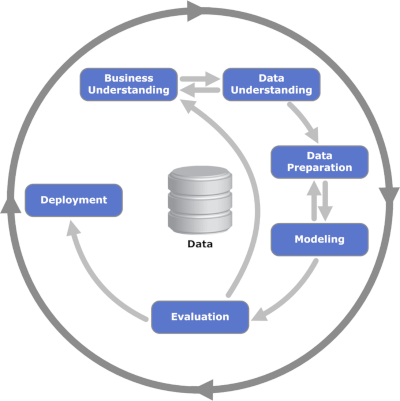

## Part 2 Case Study 1
### classifying iris flowers
Based on the combination of four features of Iris flowers, we build a model to assign a class label for a Iris flower

Four features:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm
4. petal width in cm

Three classes
1. Setosa  
2. Versicolour 
3. Virginica

Target variable
* species of an iris plant (class label) 


### Follow CRISP-DM six phases
1. Understand project business: no business purpose; just for learning. Assign project requirements and objectives
2. Understand data: collect Iris data; describe data, such as the number of records; range of length, etc.
3. Prepare data for data mining: check missing data, incorrect data, repeated data
4. Build model: select one or more classifiers; train the model on Iris dataset
5. Evaluate model: evaluate one or more classifier for effectiveness; check predictive accuracy
6. Deploy model: write a project report


### Step by step Python implementation 
1. Loading the data set
2. Understand the data 
3. Build a model 
4. Evaluate the model

### Import and check libraries
* Import library: `pandas` for representing data; `Sklearn` for machine learning
* Check library version. Be careful: methods may be different in different versions.

In [ ]:
# check the version of scikit-learn
import pandas
import sklearn
print('sklearn version')
print(sklearn.__version__)

### Load Data
* Use Python library pandas to load the data. 
* Pandas is common Python Data Analysis Library 
* `pandas.read_csv` read the CSV to a data frame (= a spread sheet)
* If we open the spreadsheet *iris.csv*, we will find no column name. So, we add column names

In [ ]:
# Load dataset
file = "./iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pandas.read_csv(file, names=names)

### Check the data shape 
* Check how rows and how many columns.

In [ ]:
# shape
print(df.shape)

### Understand data
* Print first 5 samples
* Print last 5 samples

In [ ]:
# head
print(df.head(5))
# tail
print(df.tail(5))

### Check number of instances in each class
* Count instances in each class
* Pandas groupby function
* `df.groupby('class').size()`: group data by the column of **class** and calculate the group size
 


In [ ]:
# class distribution
print(df.groupby('class').size())

### Exploratory data analysis
* EDA is to visualise data for understudying data
* Plot histograms: `df.hist()` is a data frame built-in method for plotting histograms
* Each bin counts the number of samples, for example, the bin *petal-length =1* has about 35 samples

In [ ]:
# Plot histograms
import matplotlib.pyplot as plt
df.hist()
plt.show()

### Prepare Data: sperate features and target 
* Column 0 to 3 are features
* Column 4 is the target (species class)
* Slice the data frame: `df.iloc[:,0:4]` for columns 0,1,2,3 (but 4 is excluded)
* `df.iloc[:,4]` for column 4 


In [ ]:
#split dataset in features and target variable
X = df.iloc[:,0:4] # we choose all four features
#X = df.iloc[:, 0:2] # we choose first two features as X.  
y = df.iloc[:,4]
#show y
print(y)

### Prepare Data: training and test data  
* We must split data into training and test data. 
* Why? 
* Assume we train a police dog for detecting drugs.
* We train the daog with parcels with labels (with drug or without) first (training)
* Then we test the performance of the dog on other parcels and check the accuracy of detecting drugs

### Prepare Data: training and test data  
* We split data: 70% of data as a training dataset and 30% for test
* `train_test_split(X, y, test_size=0.3, random_state=1)`: input feature data X, and label data y
* return four features and label data on training and test data
* Splitting is random, relying on a parameter: random_state. We set `random_state=1` for repeating same results


In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10) # 50% training and 50% test with random seed = 10
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### Build Model
* We choose decision tree as our model. A decision tree is very intuitive can be interpreted as IF THEN rules

|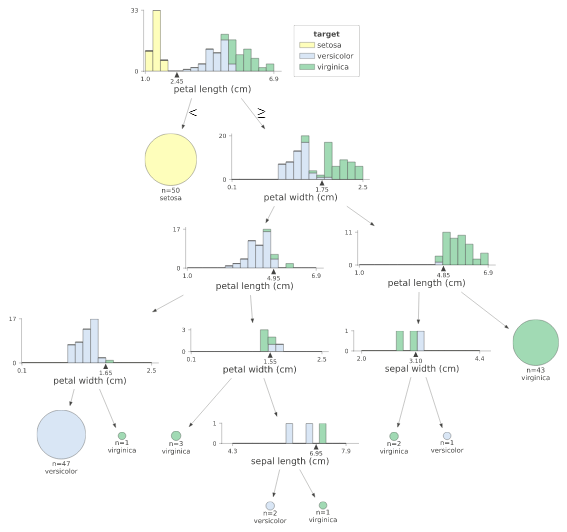|
|:--:|
|[Decision tree of Iris classification](https://mljar.com/blog/visualize-decision-tree/output_19_0.svg)|

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy')

* `DecisionTreeClassifier(criterion='entropy’)` return a classifier object (we name it `clf`)
* `criterion='entropy’` is a parameter

### Train the model
* Training is called fit: fit the model with the data

In [ ]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

* `clf.fit(X_train,y_train)` is to train a classifier `cls` on training data, including both factures and labels
* Return a trained classifier

### Evaluate the model
* We apply the model to test data and make prediction of the class lable of test data
* First we apply the model `clf` on test data `X_test`. This returns predicted labels for each sample `y_pred` on test data
* We use `metrics.accuracy_score(y_test, y_pred))` to compare the difference between predicted labels and actual labels. It returns the percentage of correctly predicted samples, called **accuracy**

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

The accucary is 95.6%. 

Finally we plot the decsion tree.

In [ ]:
from matplotlib import pyplot as plt 
from sklearn import tree
clf.fit(X, y) # classify all data
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=df.columns,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],filled=True)

## Summary
* In this session, we learn Cross Industry Standard Process for Data Mining, which is a standard, open, which has been widely used process for data mining.
* We adopt CRISP-DM and apply it to our first machine learning project
* We have learned the basic process of machine learnng for data analysis: **understand data, prepare data, build model and evaluate model**